In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour des jolis graphiques
sns.set(style="darkgrid")


Matplotlib is building the font cache; this may take a moment.


In [3]:
# Charger le fichier CSV
df = pd.read_csv("../data/netflix_titles.csv")

# Afficher les 5 premières lignes
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
# Nombre de valeurs manquantes par colonne
df.isnull().sum()



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
colonnes_a_supprimer = ['show_id', 'description']
df_clean = df.drop(columns=colonnes_a_supprimer)



In [8]:
df_clean['director'] = df_clean['director'].fillna('Unknown')
df_clean['cast'] = df_clean['cast'].fillna('Unknown')
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean['date_added'] = df_clean['date_added'].fillna('Unknown')
df_clean['rating'] = df_clean['rating'].fillna('Unknown')
df_clean['duration'] = df_clean['duration'].fillna('Unknown')


In [9]:
df_clean.isnull().sum()


type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5732\1527005653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')


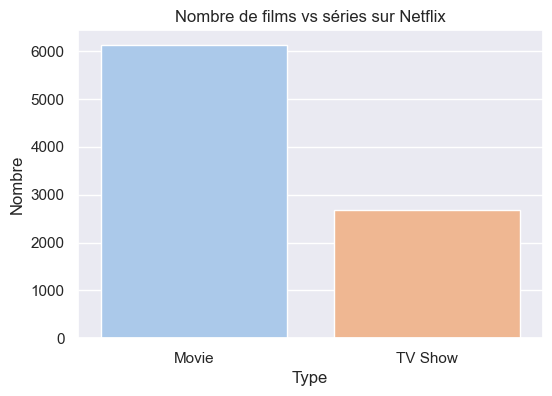

In [10]:
# Compter le nombre de films et séries
type_counts = df_clean['type'].value_counts()

# Afficher
print(type_counts)

# Visualiser avec un graphique
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')
plt.title("Nombre de films vs séries sur Netflix")
plt.ylabel("Nombre")
plt.xlabel("Type")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5732\3300930231.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Count', y='Country', palette='viridis')


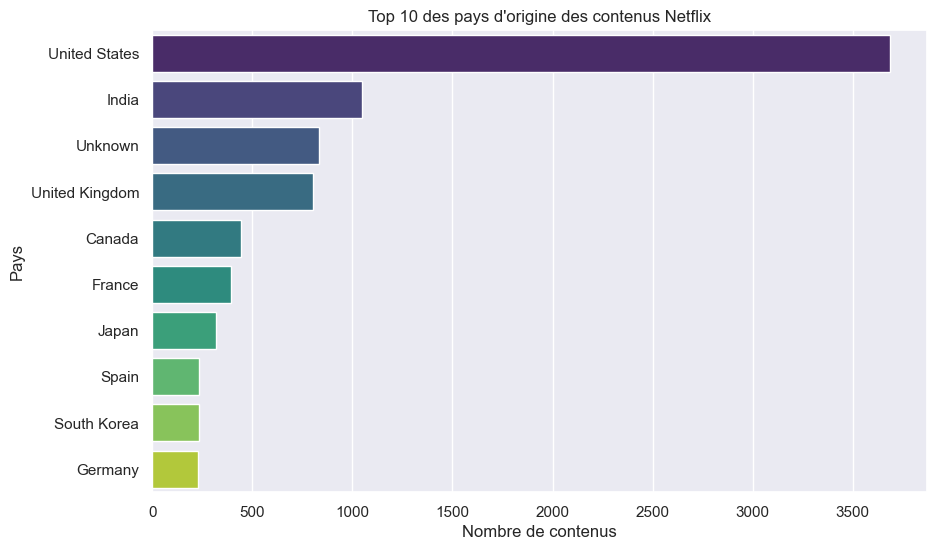

In [11]:
from collections import Counter

# Séparer les pays (par exemple "United States, Canada" devient ["United States", "Canada"])
all_countries = df_clean['country'].str.split(', ').dropna().tolist()

# Aplatir la liste de listes en une seule liste
flat_countries = [country for sublist in all_countries for country in sublist]

# Compter la fréquence
country_counts = Counter(flat_countries)

# Transformer en DataFrame
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])

# Trier par ordre décroissant et prendre les 10 premiers
top_countries = country_df.sort_values(by='Count', ascending=False).head(10)

# Afficher le graphique
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Count', y='Country', palette='viridis')
plt.title("Top 10 des pays d'origine des contenus Netflix")
plt.xlabel("Nombre de contenus")
plt.ylabel("Pays")
plt.show()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5732\2513715652.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Count', y='Genre', palette='magma')


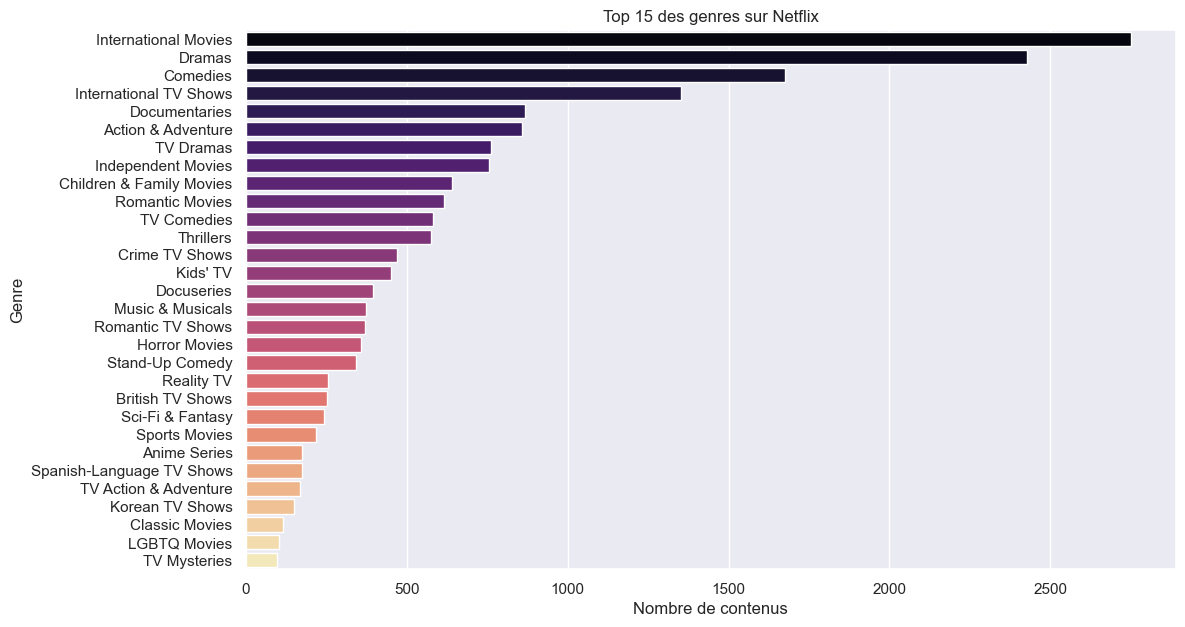

In [15]:
# Séparer les genres
all_genres = df_clean['listed_in'].str.split(', ').dropna().tolist()

# Aplatir la liste
flat_genres = [genre for sublist in all_genres for genre in sublist]

# Compter la fréquence
from collections import Counter
genre_counts = Counter(flat_genres)

# Transformer en DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier et prendre les 30 premiers
top_genres = genre_df.sort_values(by='Count', ascending=False).head(30)

# Afficher le graphique
plt.figure(figsize=(12,7))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='magma')
plt.title("Top 15 des genres sur Netflix")
plt.xlabel("Nombre de contenus")
plt.ylabel("Genre")
plt.show()

